# Inteligência Artificial - T1
Prof. Eraldo Luís Rezende Fernandes \\
FACOM – UFMS – 2020.1 \\
Aluno: Pedro Luiz da Costa Silva - RGA 2018.1904.032-5 \\

**Submissão final - Trabalho 1**

# Observação
Foi criada uma variável global chamada rstateglobal, que entrará como atributo random_state na chamada de train_test_split. Isto foi feito para retirar variações na acurácia.

In [ ]:
rstateglobal = 1

# Inicialização do dataset

##Carregamento das bibliotecas e dataset de treino

In [ ]:
# Código usado para não mostrar as warnings da sklearn
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import math
import random

import numpy as np
import pandas as pd
from matplotlib import colors
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, fixed
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


#Esta classe não foi usada
'''
class IdentityNormalize(colors.Normalize):
  def __call__(self, value, clip=None):
      return value

id_norm = IdentityNormalize()
'''

'\nclass IdentityNormalize(colors.Normalize):\n  def __call__(self, value, clip=None):\n      return value\n\nid_norm = IdentityNormalize()\n'

In [ ]:
CLASSES = ("airplane", "automobile", "bird", "cat", "deer", 
           "dog", "frog", "horse", "ship", "truck")

df_train_original = pd.read_csv("https://github.com/eraldoluis/cifar10-datasets/raw/master/cifar10-train.csv.zip")
df_train_original.head()

,label,p_00_00,p_00_01,p_00_02,p_00_03,p_00_04,p_00_05,p_00_06,p_00_07,p_00_08,...,p_31_22,p_31_23,p_31_24,p_31_25,p_31_26,p_31_27,p_31_28,p_31_29,p_31_30,p_31_31
0,6,61.0,45.0,48.0,56.0,77.0,95.0,111.0,115.0,122.0,...,92.0,95.0,101.0,92.0,71.0,82.0,144.0,188.0,123.0,97.0
1,9,173.0,135.0,104.0,101.0,130.0,165.0,188.0,196.0,153.0,...,23.0,46.0,65.0,91.0,114.0,129.0,133.0,136.0,136.0,136.0
2,9,255.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,...,75.0,80.0,77.0,66.0,63.0,69.0,77.0,83.0,84.0,85.0
3,4,25.0,34.0,35.0,37.0,39.0,37.0,37.0,22.0,26.0,...,81.0,64.0,80.0,67.0,76.0,75.0,58.0,47.0,56.0,65.0
4,1,179.0,177.0,185.0,192.0,194.0,193.0,194.0,193.0,192.0,...,88.0,85.0,82.0,79.0,79.0,75.0,74.0,78.0,74.0,76.0


##Divisão do dataframe em arrays numpy (guardados em x_original e y_original)

In [ ]:
x_original = np.array(df_train_original.drop(columns=["label"])).reshape(-1, 32, 32)
y_original = np.array(df_train_original["label"])
print("x_original.shape:", x_original.shape)
print("y_original.shape:", y_original.shape)

x_original.shape: (2000, 32, 32)
y_original.shape: (2000,)


##Mostrando exemplos do dataset

In [ ]:
def plot_exemplo(idx_ex):
  # Imagem do exemplo.
  x_ex = x_original[idx_ex]
  # Classe do exemplo (ID).
  y_ex = y_original[idx_ex]

  # Exibe imagem.
  plt.figure(figsize=(2, 2))
  plt.imshow(x_ex, cmap=plt.cm.gray)
  plt.axis('off')
  plt.title(f"Classe: {CLASSES[y_ex]}")
  plt.show()

In [ ]:
idx_ex = 0

interact(plot_exemplo, idx_ex=IntSlider(value=idx_ex, min=0, max=x_original.shape[0]))

interactive(children=(IntSlider(value=0, description='idx_ex', max=2000), Output()), _dom_classes=('widget-int…

<function __main__.plot_exemplo>

# Funções para a aplicação de Regressão Logísitica

## Regressão Logística a partir de um Dataframe Pandas - Holdout
C_usado se refere ao atributo C de LogisticRegression.

In [ ]:
def regressaoLogisticaDf(df_usado, c_usado, grau_poly):
  x_usado = np.array(df_usado.drop(columns=["label"]))
  y_usado = np.array(df_usado["label"])

  x_train, x_val, y_train, y_val = train_test_split(x_usado, y_usado, test_size=0.2,
                                                    random_state=rstateglobal)

  # Normalização de atributos min-max.
  scaler = MinMaxScaler()

  # Regressor logístico.
  clf = LogisticRegression(max_iter=100,
                          C=c_usado)

  # Cria uma lista pro pipeline.
  listaPipeline = [("scaler", scaler),
                        ("clf", clf)]

  if grau_poly > 0:
    poly = PolynomialFeatures(degree=grau_poly, interaction_only=True)
    listaPipeline.append(("poly", poly))

  # Cria o pipeline
  pipeline = Pipeline(listaPipeline)

  # Treina modelo.
  pipeline.fit(x_train, y_train)

  y_pred = pipeline.predict(x_val)

  acuracia = accuracy_score(y_val, y_pred)

  print("Acurácia:", acuracia)

  return acuracia

## Regressão Logística a partir de um Array Numpy - Holdout
C_usado se refere ao atributo C de LogisticRegression.

In [ ]:
def regressaoLogisticaArray(x_usado, y_usado, grau_poly):
  # Normalização de atributos min-max.
  scaler = MinMaxScaler()

  # Regressor logístico.
  clf = LogisticRegression(penalty = "none")

  # Cria o pipeline
  if grau_poly > 0:
    poly = PolynomialFeatures(degree=grau_poly, interaction_only=True)
    pipeline = Pipeline([("scaler", scaler),
                       ("poly", poly),
                        ("clf", clf)])
  else:
    pipeline = Pipeline([("scaler", scaler),
                        ("clf", clf)])

  # Validação hold-out.
  x_train, x_val, y_train, y_val = train_test_split(x_usado, y_usado, test_size=0.2, random_state=rstateglobal)

  # Treina modelo.
  pipeline.fit(x_train, y_train)

  y_pred = pipeline.predict(x_val)

  acuracia = accuracy_score(y_val, y_pred)

  print("Acurácia:", acuracia)

  return acuracia

In [ ]:
def regressaoLogisticaArrayCross(x_usado, y_usado, grau_poly, tam_cross):

  # Normalização de atributos min-max.
  scaler = MinMaxScaler()

  # Regressor logístico.
  clf = LogisticRegression(penalty = "none")

  # Cria uma lista pro pipeline.
  listaPipeline = [("scaler", scaler),
                        ("clf", clf)]

  if grau_poly > 0:
    poly = PolynomialFeatures(degree=grau_poly, interaction_only=True)
    listaPipeline.append(("poly", poly))

  # Cria o pipeline
  pipeline = Pipeline(listaPipeline)

  # Executa validação cruzada.
  scores = cross_val_score(pipeline, x_res, y, cv=tam_cross,
                            scoring="neg_mean_squared_error")

  # Inverte sinal para ficar positivo.
  scores = -scores

  print(f"MSE: {scores.mean():.5f} (+/- {scores.std():.5f})")

# Ideias da submissão inicial
Na submissão inicial, foram tirados os dois pixels da borda e gerados os atributos polinomiais pelas funções "modifica_df_lico" e "modifica_df_quad3x3". Essas modificações foram salvas em um novo dataframe ao invés de um array numpy.

## Gerando df_train_borda, sem dois pixels de borda
Consideramos que os pixels da borda não tenham tanto efeito para o cálculo da acurácia. Portanto, geramos um outro dataset chamado df_train_borda, que não possuirá as colunas correspondentes aos pixels da borda de tamanho 2. Isto é feito através da função abaixo.

In [ ]:
def modifica_df_borda(df_atual):

  if'label' in df_atual.columns:
    colstart = 1
  else:
    colstart = 0

  #-------------------------------------------------
  # 1. Retirando colunas da borda
  #-------------------------------------------------

  df_train_borda = df_atual

  colunasDrop = []

  for column in df_train_borda.columns:
    if "00" in column or "01" in column or "30" in column or "31" in column:
      colunasDrop.append(column)

  df_train_borda = df_train_borda.drop(columns=colunasDrop)

  #-------------------------------------------------
  # 2. Renomeando colunas
  #-------------------------------------------------

  tam = int(math.sqrt(df_train_borda.shape[1] - colstart))

  nomescolnovo = []

  if colstart == 1:
    nomescolnovo.append('label')

  for i in range(tam):
    for j in range(tam):
      nomescolnovo.append('p_' + str(i).zfill(2) + '_' + str(j).zfill(2))

  df_train_borda.columns = nomescolnovo

  return df_train_borda

* Abaixo, a visualização das imagens sem a borda:

In [ ]:
df_train_borda = modifica_df_borda(df_train_original)

x_borda = np.array(df_train_borda.drop(columns=["label"])).reshape(-1, 28, 28)
y_borda = np.array(df_train_borda["label"])
print("x_2.shape:", x_borda.shape)
print("y_2.shape:", y_borda.shape)

x_2.shape: (2000, 28, 28)
y_2.shape: (2000,)


In [ ]:
def plot_exemplo_2(idx_ex):
  # Imagem do exemplo.
  x_ex = x_borda[idx_ex]
  # Classe do exemplo (ID).
  y_ex = y_borda[idx_ex]

  # Exibe imagem.
  plt.figure(figsize=(2, 2))
  plt.imshow(x_ex, cmap=plt.cm.gray)
  plt.axis('off')
  plt.title(f"Classe: {CLASSES[y_ex]}")
  plt.show()

In [ ]:
idx_ex = 0

interact(plot_exemplo_2, idx_ex=IntSlider(value=idx_ex, min=0, max=x_borda.shape[0]))

interactive(children=(IntSlider(value=0, description='idx_ex', max=2000), Output()), _dom_classes=('widget-int…

<function __main__.plot_exemplo_2>

## Atributos polinomiais

### **Quadrado 3x3**
Calcula-se a multiplicação dos valores (divididos por 255 e somados em 0.3) de todos os quadrados 3x3 possíveis. O valor 0.3 foi obtido experimentalmente. \\
Como a malha é de 28 pixels, existem 26x26 quadrados 3x3 possíveis. \\
Cria-se colunas com nome "ele_x_y", que devem armazenar o valor do quadrado 3x3 com canto superior esquerdo em (x, y).

* Primeiramente, definimos uma função para cálculo do valor em "ele_x_y"

In [ ]:
def calcvaldf3x3(df_atual, inst, li, co):
  val = 1

  for i in range(3):
    for j in range(3):
      val*=df_atual.at[inst, 'p_' + str(li + i).zfill(2) + '_' + str(co + j).zfill(2)]/255 + 0.3
  return val

* Assim, podemos modificar o dataframe através da função abaixo.

In [ ]:
def modifica_df_quad3x3(df_atual):
  #---------------------------------------------------
  # 1. Obtendo nomes novos das colunas (listanome3x3)
  #---------------------------------------------------

  tam = int(math.sqrt(df_atual.shape[1] - 1))

  listanome3x3 = []

  for i in range(tam - 2):
    for j in range(tam - 2):
      listanome3x3.append("ele_"+str(i).zfill(2)+"_"+str(j).zfill(2))


  #--------------------------------------------------------------------
  # 2. Obtendo lista3x3, que possui todos os valores dos quadrados 3x3
  #--------------------------------------------------------------------

  inst = df_atual.shape[0]

  lista3x3 = []

  for i in range(inst):
    lista3x3aux = []

    for j in range(tam - 2):
      for k in range(tam - 2):
        valor = calcvaldf3x3(df_atual, i, j, k)
        lista3x3aux.append(valor)

    lista3x3.append(lista3x3aux)

  #-------------------------------
  # 3. Concatenando os dataframes
  #-------------------------------

  df_3x3 = pd.DataFrame(lista3x3, columns = listanome3x3)
  df_ret = pd.concat([df_atual, df_3x3], axis=1)

  return df_ret

### Multiplicação dos valores das linhas e colunas

Estes atributos são gerados multiplicando, pra cada linha e coluna, os valores dos elementos divididos por 255 e acrescentados em 1. Esta mudança nos valores foi necessária para não gerar atributos com valores muito grandes.

In [ ]:
def modifica_df_lico(df_atual):
  # colstart usado para não modificar os valores em label

  if'label' in df_atual.columns:
    colstart = 1
  else:
    colstart = 0

  #-------------------------------------------------
  # 1. Obtendo nomes das novas colunas do dataframe
  #-------------------------------------------------

  tam = int(math.sqrt(df_atual.shape[1] - colstart))

  dictli = {}
  dictcol = {}

  for i in range(tam):
    dictli[i] = 1
    dictcol[i] = 1

  nomesnovos1 = []
  nomesnovos2 = []

  for i in range(tam):
    nomesnovos1.append('lin_' + str(i).zfill(2))
    nomesnovos2.append('col_' + str(i).zfill(2))


  #--------------------------------------------------------------------------
  # 2. Obtendo listalinhas e listacolunas
  #     listalinhas e listacolunas são listas de listas,
  #     e serão posteriormente parâmetros para criação de um novo dataframe
  #--------------------------------------------------------------------------

  colaux = df_atual.columns[colstart:]

  inst = df_atual.shape[0]

  listalinhas = []
  listacolunas = []

  for i in range(inst):
    multtodos = 1

    for column in colaux:
      li = column[2:4]
      col = column[5:]
      val = df_atual[column][i]/255 + 1

      dictli[int(li)] *= val
      dictcol[int(col)] *= val

    listaliaux = []
    listacolaux = []

    for aux in list(dictli.items()):
      listaliaux.append(aux[1])

    for aux in list(dictcol.items()):
      listacolaux.append(aux[1])
    
    listalinhas.append(listaliaux)
    listacolunas.append(listacolaux)

    for i in range(tam):
      dictli[i] = 1
      dictcol[i] = 1

  #-----------------------------
  # 3. Concatenando o dataframe
  #-----------------------------

  df_linhas = pd.DataFrame(listalinhas, columns = nomesnovos1)
  df_colunas = pd.DataFrame(listacolunas, columns = nomesnovos2)

  df_ret = pd.concat([df_atual, df_linhas, df_colunas], axis=1)

  return df_ret

## Aplicando regressão logística em df_train_original (32x32)
Foi passado o parâmetro para o Logistic Regression C = 0.006 para o Logistic Regression, obtido através de testes.

In [ ]:
regressaoLogisticaDf(df_train_original, 0.006, 0)

Acurácia: 0.285


0.285

## Modificando e aplicando regressão logística em df_train (32x32)
Em df_train foram aplicados os atributos polinomiais, porém a borda foi mantida.

Foi passado o parâmetro para o Logistic Regression C = 0.006 para o Logistic Regression, obtido através de testes.

In [ ]:
df_train        = modifica_df_lico(df_train_original)
df_train.shape

(2000, 1089)

In [ ]:
df_train        = modifica_df_quad3x3(df_train)
df_train.shape

(2000, 1989)

In [ ]:
regressaoLogisticaDf(df_train, 0.006, 0)

Acurácia: 0.305


0.305

## Modificando e aplicando regressão logística em df_train_borda (28x28)
Em df_train_borda foram aplicados os atributos polinomiais e a borda não foi mantida.

Foi passado o parâmetro para o Logistic Regression C = 0.006 para o Logistic Regression, obtido através de testes.

In [ ]:
df_train_borda  = modifica_df_lico(df_train_borda)
df_train_borda.shape

(2000, 841)

In [ ]:
df_train_borda  = modifica_df_quad3x3(df_train_borda)
df_train_borda.shape

(2000, 1517)

In [ ]:
regressaoLogisticaDf(df_train_borda, 0.006, 0)

Acurácia: 0.3


0.3

## Conclusões
Como o valor da acurácia não variou tanto, concluiu-se que os dois pixels da borda não são tão importantes na obtenção da acurácia. \\
Além disso, conclui-se que os métodos tentados para gerar novos atributos polinomiais, apesar de aumentarem um pouco a acurácia, são muito ineficientes. 

# Ideias da submissão preliminar
Para a submissão preliminar, foram usadas, além da modificação de tirar a borda e a dos quadrados 3x3 anteriores, três novas modificações que tentam "desenhar" formas no desenho: linhas 5x1, linhas 1x5 e quadrados 2x2. \\

Além disso, tentou-se usar um método que atribuía pesos maiores para pixels mais centrais.

## Atributos polinomiais

### Quadrados 2x2
Analogamente ao quadrado 3x3, definimos uma função para calcular o valor em "quad2_x_y"

In [ ]:
def calcval2x2(df_atual, inst, li, co):
  val = 1

  for i in range(2):
    for j in range(2):
      val*=(df_atual.at[inst, 'p_' + str(li + i).zfill(2) + '_' + str(co + j).zfill(2)]/255 + 0.3)
  return val

In [ ]:
def modifica_df_quad2x2(df_atual, tam):
  #---------------------------------------------------
  # 1. Obtendo nomes novos das colunas (listanome2x2)
  #---------------------------------------------------

  listanome2x2 = []

  for i in range(tam - 1):
    for j in range(tam - 1):
      listanome2x2.append("quad10_"+str(i).zfill(2)+"_"+str(j).zfill(2))


  #--------------------------------------------------------------------
  # 2. Obtendo lista2x2, que possui todos os valores dos quadrados 2x2
  #--------------------------------------------------------------------

  inst = df_atual.shape[0]

  lista2x2 = []

  for i in range(inst):
    lista2x2aux = []

    for j in range(tam - 1):
      for k in range(tam - 1):
        valor = calcval2x2(df_atual, i, j, k)
        lista2x2aux.append(valor)

    lista2x2.append(lista2x2aux)

  #-------------------------------
  # 3. Concatenando os dataframes
  #-------------------------------

  df_2x2 = pd.DataFrame(lista2x2, columns = listanome2x2)
  df_ret = pd.concat([df_atual, df_2x2], axis=1)

  return df_ret

### Linhas 1x5
Definimos uma função para calcular o valor em "li1x5_x_y"

In [ ]:
def calcval1x5(df_atual, inst, li, co):
  val = 1

  for i in range(5):
    val*=(df_atual.at[inst, 'p_' + str(li).zfill(2) + '_' + str(i + co).zfill(2)]/255)
  return val

Assim, podemos modificar o dataframe através da função abaixo.

In [ ]:
def modifica_df_linha1x5(df_atual, tam):
  #---------------------------------------------------
  # 1. Obtendo nomes novos das colunas (listanome1x5)
  #---------------------------------------------------

  listanome1x5 = []

  for i in range(tam):
    for j in range(tam - 4):
      listanome1x5.append("li1x5_"+str(i).zfill(2)+"_"+str(j).zfill(2))


  #--------------------------------------------------------------------
  # 2. Obtendo lista3x3, que possui todos os valores dos quadrados 3x3
  #--------------------------------------------------------------------

  inst = df_atual.shape[0]

  lista1x5 = []

  for i in range(inst):
    lista1x5aux = []

    for j in range(tam):
      for k in range(tam - 4):
        valor = calcval1x5(df_atual, i, j, k)
        lista1x5aux.append(valor)

    lista1x5.append(lista1x5aux)

  #-------------------------------
  # 3. Concatenando os dataframes
  #-------------------------------

  df_1x5 = pd.DataFrame(lista1x5, columns = listanome1x5)
  df_ret = pd.concat([df_atual, df_1x5], axis=1)

  return df_ret

### Linhas 5x1

Definimos uma função para calcular o valor em "li5x1_x_y"

In [ ]:
def calcval5x1(df_atual, inst, li, co):
  val = 1

  for i in range(5):
    val*=(df_atual.at[inst, 'p_' + str(i + li).zfill(2) + '_' + str(co).zfill(2)]/255)
  return val

Assim, podemos modificar o dataframe através da função abaixo.

In [ ]:
def modifica_df_linha5x1(df_atual, tam):
  #---------------------------------------------------
  # 1. Obtendo nomes novos das colunas (listanome5x1)
  #---------------------------------------------------

  listanome5x1 = []

  for i in range(tam - 4):
    for j in range(tam):
      listanome5x1.append("li5x1_"+str(i).zfill(2)+"_"+str(j).zfill(2))


  #--------------------------------------------------------------------
  # 2. Obtendo lista3x3, que possui todos os valores dos quadrados 3x3
  #--------------------------------------------------------------------

  inst = df_atual.shape[0]

  lista5x1 = []

  for i in range(inst):
    lista5x1aux = []

    for j in range(tam - 4):
      for k in range(tam):
        valor = calcval5x1(df_atual, i, j, k)
        lista5x1aux.append(valor)

    lista5x1.append(lista5x1aux)

  #-------------------------------
  # 3. Concatenando os dataframes
  #-------------------------------

  df_5x1 = pd.DataFrame(lista5x1, columns = listanome5x1)
  df_ret = pd.concat([df_atual, df_5x1], axis=1)

  return df_ret

### Atribuição de pesos aos pixels
Nestes atributos, o valor do pixel é multiplicado pela subtração entre tam e sua distância até o centro (em percentual). \\

O valor do pixel foi multiplicado assim pois consideramos que pixels mais centrais possuem maior importância.

In [ ]:
def modifica_df_distancias(df_atual, tam):
  #---------------------------------------------------
  # 1. Obtendo nomes novos das colunas (listanomedist)
  #---------------------------------------------------

  if'label' in df_atual.columns:
    colstart = 1
  else:
    colstart = 0
    
  listanomedist = []

  for i in range(tam):
    for j in range(tam):
      listanomedist.append("dist_"+str(i).zfill(2)+"_"+str(j).zfill(2))


  #-----------------------------------------------------------------------
  # 2. Obtendo listadist, que possui todos os valores dos novos atributos
  #-----------------------------------------------------------------------

  inst = df_atual.shape[0]

  listadist = []
  maxdist = tam * math.sqrt(2)/2;

  for i in range(inst):
    listadistaux = []

    for j in range(tam):
      for k in range(tam):
        valor = df_atual.at[i, 'p_' + str(j).zfill(2) + '_' + str(k).zfill(2)]
        distx = abs(tam//2 - k)
        disty = abs(tam//2 - j)

        disttotal = math.sqrt(distx * distx + disty * disty)
        valor = valor/(disttotal*disttotal+1)

        listadistaux.append(valor)
    listadist.append(listadistaux)

  #-------------------------------
  # 3. Concatenando os dataframes
  #-------------------------------

  df_dist = pd.DataFrame(listadist, columns = listanomedist)
  df_ret = pd.concat([df_atual, df_dist], axis=1)

  return df_ret

## Modificando e aplicando regressão logística em df_train_borda (28x28)

In [ ]:
df_train_borda = modifica_df_borda(df_train_original)
df_train_borda.shape

(2000, 785)

In [ ]:
df_train_borda = modifica_df_quad3x3(df_train_borda)
df_train_borda.shape

(2000, 1461)

In [ ]:
df_train_borda = modifica_df_quad2x2(df_train_borda, 28)
df_train_borda.shape

(2000, 2190)

In [ ]:
df_train_borda = modifica_df_linha1x5(df_train_borda, 28)
df_train_borda.shape

(2000, 2862)

In [ ]:
df_train_borda = modifica_df_linha5x1(df_train_borda, 28)
df_train_borda.shape

(2000, 3534)

In [ ]:
df_train_borda = modifica_df_distancias(df_train_borda, 28)
df_train_borda.shape

(2000, 4318)

In [ ]:
regressaoLogisticaDf(df_train_borda, 0.006, 0)

Acurácia: 0.3225


0.3225

## Conclusões
Novamente, conseguimos aumentar um pouco a acurácia ao usar mais atributos polinomiais. Porém, o processo é ainda muito ineficiente, pois demora muito para gerá-los. Além disso, hipotetizou-se que a demora é, em parte, devido ao manuseio dos dados em forma de dataframes, e que seria mais rápido se fossem manuseados como Arrays Numpy.

# Ideias da submissão final

Para esta submissão, foram usados atributos baseados em filtros, com base na teoria de convolução e pooling.

## Funções usadas

### Funções de convolução

In [ ]:
def imgs_conv(imgs, filtro, stride=1):
  '''
  Aplica o filtro 'filtro' nas imagens 'imgs' usando o stride dado.

  img.shape -> (num_imagens, num_rows, num_cols)
  '''
  # Tamanho do filtro.
  f_rows = filtro.shape[0]
  f_cols = filtro.shape[1]

  # Tamanho da imagem resultante.
  num_imgs = imgs.shape[0]
  num_rows = ((imgs.shape[1] - f_rows) // stride) + 1
  num_cols = ((imgs.shape[2] - f_cols) // stride) + 1

  # Resultado da convolução.
  res = np.zeros((num_imgs, num_rows, num_cols))

  # Aplica filtro em cada posição da imagem.
  for row in range(num_rows):
    for col in range(num_cols):
      r = row*stride
      c = col*stride
      res[:,row,col] = np.multiply(filtro, imgs[:,r:r+f_rows,c:c+f_cols]).sum(axis=(1,2))
  
  return res

In [ ]:
def imgs_conv_multi(imgs, filtros, stride=1):
  '''
  Aplica uma lista de filtros nas imagens dadas. Filtros devem ser de mesmo tamanho.
  '''
  res = []
  for filtro in filtros:
    res.append(imgs_conv(imgs, filtro, stride))
  return np.stack(res).mean(axis=0)

### Funções de pooling

In [ ]:
def imgs_pool(imgs, size=8, stride=8):
  '''
  Aplica mean-pooling nas imagens dadas usadas o tamanho (size) e o stride dados.
  '''
  # Tamanho da imagem resultante.
  num_imgs = imgs.shape[0]
  num_rows = ((imgs.shape[1] - size) // stride) + 1
  num_cols = ((imgs.shape[2] - size) // stride) + 1

  # Resultado do pooling.
  res = np.zeros((num_imgs, num_rows, num_cols))

  # Aplica filtro em cada posição da imagem.
  for row in range(num_rows):
    for col in range(num_cols):
      r = row*stride
      c = col*stride
      res[:,row,col] = imgs[:,r:r+size,c:c+size].mean(axis=(1,2))
  
  return res

### Função para exibir filtros

In [ ]:
def exibe_filtro(filtro):
  plt.figure(figsize=(2, 2))
  #plt.imshow(filtro, cmap=plt.cm.gray, norm=id_norm)
  plt.imshow(filtro, cmap=plt.cm.gray)
  plt.axis('off')
  plt.show()

In [ ]:
def plot_filtros_imagem(idx_ex, filtros, pool_size, pool_stride):
  # Obtém uma matriz contendo apenas a imagem selecionada.
  x_res = x_original[idx_ex:idx_ex+1]

  # Aplica convolução.
  x_conv = imgs_conv_multi(x_res, filtros)

  # Aplica pooling.
  x_pool = imgs_pool(x_conv, size=pool_size, stride=pool_stride)

  # Cria array de imagens para os filtros
  _, axsfiltros = plt.subplots(1, len(filtros), figsize=(2*len(filtros), 4), squeeze=False)

  # Cria array de imagens para o resultado
  _, axsresult = plt.subplots(1, 3, figsize=(2*3, 4), squeeze=False)

  # Exibe filtros na primeira linha da imagem.
  for idx, filtro in enumerate(filtros):
    # axsfiltros[0][idx].imshow(filtro, cmap=plt.cm.gray, norm=id_norm)
    axsfiltros[0][idx].imshow(filtro, cmap=plt.cm.gray)
    axsfiltros[0][idx].set_title(f"Filtro {idx}: {filtro.shape}")
    axsfiltros[0][idx].axis('off')

  # Exibe imagem.
  axsresult[0][0].imshow(x_res[0], cmap=plt.cm.gray)
  axsresult[0][0].set_title(f"Classe: {CLASSES[y_original[idx_ex]]}")
  axsresult[0][0].axis('off')

  # Exibe resultado da convolução.
  axsresult[0][1].imshow(x_conv[0], cmap=plt.cm.gray)
  axsresult[0][1].set_title(f"Conv: {x_conv[0].shape}")
  axsresult[0][1].axis('off')

  # Exibe resultado do pooling.
  axsresult[0][2].imshow(x_pool[0], cmap=plt.cm.gray)
  axsresult[0][2].set_title(f"Pooling: {x_pool[0].shape}")
  axsresult[0][2].axis('off')

  plt.show()

### Função para aplicação de convolução e pooling

In [ ]:
def aplica_convol_pool(x_usado, filtros, sizeusado, strideusado, strideimagens):

  # Aplica convolução.
  x_conv = imgs_conv_multi(x_usado, filtros, strideimagens)

  # Aplica pooling.
  x_pool = imgs_pool(x_conv, size=sizeusado, stride=strideusado)

  # Volta para o shape com dois axis.
  x_res = x_pool.reshape((x_pool.shape[0], -1))

  return x_res

## Filtros criados
Foram criados filtros de tamanho 3x3 e tamanho 7x7. O conteúdo dos filtros foi baseado em referências que estão no final do Notebook.

### Filtros 3x3

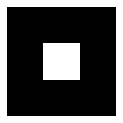

In [ ]:
# Filtro identidade: Não modifica imagem. Usado somente para comparações

f_ident3x3 = np.array([   [  0,  0,  0],
                          [  0,  1,  0],
                          [  0,  0,  0]])

exibe_filtro(f_ident3x3)

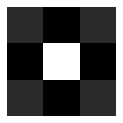

In [ ]:
# Filtro sharpen: Aguçamento da imagem

f_sharpen = np.array([[  0, -1,  0],
                      [ -1,  5, -1],
                      [  0, -1,  0]])

exibe_filtro(f_sharpen)

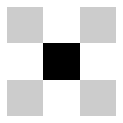

In [ ]:
# Filtro edge: Achar bordas na imagem

f_edge = np.array([   [  0,  1,  0],
                      [  1, -4,  1],
                      [  0,  1,  0]])

exibe_filtro(f_edge)

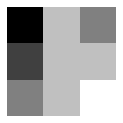

In [ ]:
# Filtro relevo: Destacar relevo da imagem

f_relevo = np.array([ [ -2,  1,  0],
                      [ -1,  1,  1],
                      [  0,  1,  2]])

exibe_filtro(f_relevo)

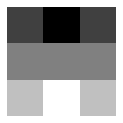

In [ ]:
# Filtro Sobel horizontal: Detecção de contorno com peso no pixel central

f_sobel_h = np.array([  [ -1, -2, -1],
                        [  0,  0,  0],
                        [  1,  2,  1]])

exibe_filtro(f_sobel_h)

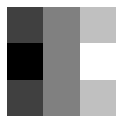

In [ ]:
# Filtro Sobel vertical: Detecção de contorno com peso no pixel central

f_sobel_v = np.array([  [ -1,  0,  1],
                        [ -2,  0,  2],
                        [ -1,  0,  1]])

exibe_filtro(f_sobel_v)

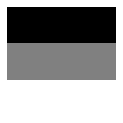

In [ ]:
# Filtro Prewitt horizontal: Detecção de contorno sem peso no pixel central

f_prewitt_h = np.array( [ [ -1, -1, -1],
                          [  0,  0,  0],
                          [  1,  1,  1]])

exibe_filtro(f_prewitt_h)

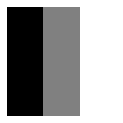

In [ ]:
# Filtro Prewitt vertical: Detecção de contorno sem peso no pixel central

f_prewitt_v = np.array( [ [ -1,  0,  1],
                          [ -1,  0,  1],
                          [ -1,  0,  1]])

exibe_filtro(f_prewitt_v)

### Filtros 7x7

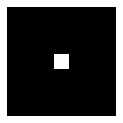

In [ ]:
# Filtro identidade: Não modifica imagem. Usado somente para comparações

f_ident7x7 = np.array([ [  0,  0,  0,  0,  0,  0,  0],
                        [  0,  0,  0,  0,  0,  0,  0],
                        [  0,  0,  0,  0,  0,  0,  0],
                        [  0,  0,  0,  1,  0,  0,  0],
                        [  0,  0,  0,  0,  0,  0,  0],
                        [  0,  0,  0,  0,  0,  0,  0],
                        [  0,  0,  0,  0,  0,  0,  0]])

exibe_filtro(f_ident7x7)

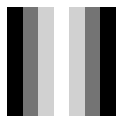

In [ ]:
# Filtro Vertical

f_vert = np.array([ [-0.1,  0.4,  0.8,  1.,   0.8,  0.4, -0.1],
                    [-0.1,  0.4,  0.8,  1.,   0.8,  0.4, -0.1],
                    [-0.1,  0.4,  0.8,  1.,   0.8,  0.4, -0.1],
                    [-0.1,  0.4,  0.8,  1.,   0.8,  0.4, -0.1],
                    [-0.1,  0.4,  0.8,  1.,   0.8,  0.4, -0.1],
                    [-0.1,  0.4,  0.8,  1.,   0.8,  0.4, -0.1],
                    [-0.1,  0.4,  0.8,  1.,   0.8,  0.4, -0.1]])

exibe_filtro(f_vert)

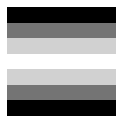

In [ ]:
# Filtro Horizontal

f_hor = np.transpose(f_vert)

exibe_filtro(f_hor)

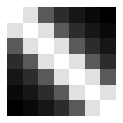

In [ ]:
# Filtro diagonal Noroeste Sudeste

f_NW_SE = np.zeros(shape=(7,7))

for row in range(f_NW_SE.shape[0]):
  for col in range(f_NW_SE.shape[1]):
    f_NW_SE[row,col] = 0.9 / abs(row - col) if abs(row - col) > 0 else 1.0

exibe_filtro(f_NW_SE)

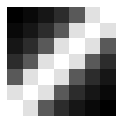

In [ ]:
# Filtro diagonal Nordeste Sudoeste

f_NE_SW = np.zeros(shape=(7,7))

for row in range(f_NE_SW.shape[0]):
  for colaux in range(f_NE_SW.shape[1]):
    col = 7 - colaux - 1
    f_NE_SW[row,col] = 0.9 / abs(row - colaux) if abs(row - colaux) > 0 else 1.0

exibe_filtro(f_NE_SW)

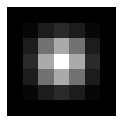

In [ ]:
# Filtro Gaussian blur

r = 1/256

f_gaussblur = np.array([[0,     0,     0,     0,     0,     0, 0],
                        [0,   1/r,   4/r,   6/r,   4/r,   1/r, 0],
                        [0,   4/r,  16/r,  24/r,  16/r,   4/r, 0],
                        [0,   6/r,  24/r,  36/r,  24/r,   6/r, 0],
                        [0,   4/r,  16/r,  24/r,  16/r,   4/r, 0],
                        [0,   1/r,   4/r,   6/r,   4/r,   1/r, 0],
                        [0,     0,     0,     0,     0,     0, 0]])

exibe_filtro(f_gaussblur)

## Visualização dos filtros

In [ ]:
filtros_exemplo = [f_gaussblur, f_vert]

num_imgs = x_original.shape[0]

interact(plot_filtros_imagem, 
         idx_ex=IntSlider(value=0, min=0, max=num_imgs),
         filtros=fixed(filtros_exemplo),
         pool_size=IntSlider(value=6, min=1, max=32), 
         pool_stride=IntSlider(value=3, min=1, max=16))

interactive(children=(IntSlider(value=0, description='idx_ex', max=2000), IntSlider(value=6, description='pool…

<function __main__.plot_filtros_imagem>

## Regressão logística usando os atributos baseados em filtros

* Usaremos as funções abaixo:

In [ ]:
def aplica_reg_filtros(filtros, size_conv, stride_conv, stride_imagem, grau_poly):
  x_res = aplica_convol_pool(x_original, filtros, size_conv, stride_conv, stride_imagem)
  return regressaoLogisticaArray(x_res, y_original, grau_poly)

In [ ]:
def testafiltros(filtros, minsize, maxsize, minstride, maxstride):
  acuracias = []
  valores = []

  for i in range(maxsize - minsize + 1):
    for j in range(maxstride - minstride + 1):
      size = i + minsize
      stride = j + minstride
      print("Size: " + str(size) + ", Stride: " + str(stride), end = ", ")

      acuracias.append(aplica_reg_filtros(filtros, size, stride, 1, 2))
      valores.append((size, stride))

  aux = acuracias.index(max(acuracias))
  string = "\nMaior valor: "
  string += str(acuracias[aux])
  string += ", Size: "
  string += str(valores[aux][0])
  string += ", Stride: "
  string += str(valores[aux][1])

  print(string)

### 1. Somente filtro identidade 3x3

In [ ]:
filtros = []
filtros.append(f_ident3x3)

testafiltros(filtros, 3, 7, 3, 6)

Size: 3, Stride: 3, Acurácia: 0.2775
Size: 3, Stride: 4, Acurácia: 0.32
Size: 3, Stride: 5, Acurácia: 0.2875
Size: 3, Stride: 6, Acurácia: 0.27
Size: 4, Stride: 3, Acurácia: 0.29
Size: 4, Stride: 4, Acurácia: 0.2975
Size: 4, Stride: 5, Acurácia: 0.2825
Size: 4, Stride: 6, Acurácia: 0.2975
Size: 5, Stride: 3, Acurácia: 0.2925
Size: 5, Stride: 4, Acurácia: 0.29
Size: 5, Stride: 5, Acurácia: 0.2975
Size: 5, Stride: 6, Acurácia: 0.315
Size: 6, Stride: 3, Acurácia: 0.305
Size: 6, Stride: 4, Acurácia: 0.29
Size: 6, Stride: 5, Acurácia: 0.2975
Size: 6, Stride: 6, Acurácia: 0.3
Size: 7, Stride: 3, Acurácia: 0.315
Size: 7, Stride: 4, Acurácia: 0.31
Size: 7, Stride: 5, Acurácia: 0.3
Size: 7, Stride: 6, Acurácia: 0.31

Maior valor: 0.32, Size: 3, Stride: 4


### 2. Somente filtro identidade 7x7

In [ ]:
filtros = []
filtros.append(f_ident7x7)

testafiltros(filtros, 3, 7, 3, 6)

Size: 3, Stride: 3, Acurácia: 0.295
Size: 3, Stride: 4, Acurácia: 0.285
Size: 3, Stride: 5, Acurácia: 0.2975
Size: 3, Stride: 6, Acurácia: 0.27
Size: 4, Stride: 3, Acurácia: 0.2975
Size: 4, Stride: 4, Acurácia: 0.3075
Size: 4, Stride: 5, Acurácia: 0.325
Size: 4, Stride: 6, Acurácia: 0.2975
Size: 5, Stride: 3, Acurácia: 0.3025
Size: 5, Stride: 4, Acurácia: 0.3
Size: 5, Stride: 5, Acurácia: 0.2925
Size: 5, Stride: 6, Acurácia: 0.3025
Size: 6, Stride: 3, Acurácia: 0.2925
Size: 6, Stride: 4, Acurácia: 0.2925
Size: 6, Stride: 5, Acurácia: 0.325
Size: 6, Stride: 6, Acurácia: 0.295
Size: 7, Stride: 3, Acurácia: 0.2825
Size: 7, Stride: 4, Acurácia: 0.2925
Size: 7, Stride: 5, Acurácia: 0.285
Size: 7, Stride: 6, Acurácia: 0.2875

Maior valor: 0.325, Size: 4, Stride: 5


### 3. Todos filtros 3x3, menos identidade

In [ ]:
filtros = []
filtros.append(f_sharpen)
filtros.append(f_edge)
filtros.append(f_relevo)
filtros.append(f_sobel_h)
filtros.append(f_sobel_v)
filtros.append(f_prewitt_h)
filtros.append(f_prewitt_v)

testafiltros(filtros, 3, 7, 3, 6)

Size: 3, Stride: 3, Acurácia: 0.215
Size: 3, Stride: 4, Acurácia: 0.24
Size: 3, Stride: 5, Acurácia: 0.2475
Size: 3, Stride: 6, Acurácia: 0.255
Size: 4, Stride: 3, Acurácia: 0.245
Size: 4, Stride: 4, Acurácia: 0.2725
Size: 4, Stride: 5, Acurácia: 0.255
Size: 4, Stride: 6, Acurácia: 0.265
Size: 5, Stride: 3, Acurácia: 0.27
Size: 5, Stride: 4, Acurácia: 0.2675
Size: 5, Stride: 5, Acurácia: 0.27
Size: 5, Stride: 6, Acurácia: 0.3075
Size: 6, Stride: 3, Acurácia: 0.275
Size: 6, Stride: 4, Acurácia: 0.315
Size: 6, Stride: 5, Acurácia: 0.2825
Size: 6, Stride: 6, Acurácia: 0.3075
Size: 7, Stride: 3, Acurácia: 0.3025
Size: 7, Stride: 4, Acurácia: 0.2825
Size: 7, Stride: 5, Acurácia: 0.2875
Size: 7, Stride: 6, Acurácia: 0.2525

Maior valor: 0.315, Size: 6, Stride: 4


### 4. Todos filtros 3x3, menos identidade, Prewitt e Edge

In [ ]:
filtros = []
filtros.append(f_sharpen)
filtros.append(f_relevo)
filtros.append(f_sobel_h)
filtros.append(f_sobel_v)

testafiltros(filtros, 3, 7, 3, 6)

Size: 3, Stride: 3, Acurácia: 0.215
Size: 3, Stride: 4, Acurácia: 0.28
Size: 3, Stride: 5, Acurácia: 0.2425
Size: 3, Stride: 6, Acurácia: 0.2975
Size: 4, Stride: 3, Acurácia: 0.265
Size: 4, Stride: 4, Acurácia: 0.305
Size: 4, Stride: 5, Acurácia: 0.2725
Size: 4, Stride: 6, Acurácia: 0.2975
Size: 5, Stride: 3, Acurácia: 0.28
Size: 5, Stride: 4, Acurácia: 0.2825
Size: 5, Stride: 5, Acurácia: 0.2825
Size: 5, Stride: 6, Acurácia: 0.34
Size: 6, Stride: 3, Acurácia: 0.2975
Size: 6, Stride: 4, Acurácia: 0.32
Size: 6, Stride: 5, Acurácia: 0.3
Size: 6, Stride: 6, Acurácia: 0.3
Size: 7, Stride: 3, Acurácia: 0.31
Size: 7, Stride: 4, Acurácia: 0.2775
Size: 7, Stride: 5, Acurácia: 0.3275
Size: 7, Stride: 6, Acurácia: 0.26

Maior valor: 0.34, Size: 5, Stride: 6


### 5. Todos filtros 7x7, menos identidade

In [ ]:
filtros = []
filtros.append(f_gaussblur)
filtros.append(f_hor)
filtros.append(f_vert)
filtros.append(f_NE_SW)
filtros.append(f_NW_SE)

testafiltros(filtros, 3, 7, 3, 6)

Size: 3, Stride: 3, Acurácia: 0.3075
Size: 3, Stride: 4, Acurácia: 0.3025
Size: 3, Stride: 5, Acurácia: 0.3025
Size: 3, Stride: 6, Acurácia: 0.3125
Size: 4, Stride: 3, Acurácia: 0.3025
Size: 4, Stride: 4, Acurácia: 0.3225
Size: 4, Stride: 5, Acurácia: 0.3075
Size: 4, Stride: 6, Acurácia: 0.3125
Size: 5, Stride: 3, Acurácia: 0.3075
Size: 5, Stride: 4, Acurácia: 0.31
Size: 5, Stride: 5, Acurácia: 0.305
Size: 5, Stride: 6, Acurácia: 0.305
Size: 6, Stride: 3, Acurácia: 0.3125
Size: 6, Stride: 4, Acurácia: 0.275
Size: 6, Stride: 5, Acurácia: 0.325
Size: 6, Stride: 6, Acurácia: 0.29
Size: 7, Stride: 3, Acurácia: 0.2975
Size: 7, Stride: 4, Acurácia: 0.3075
Size: 7, Stride: 5, Acurácia: 0.2875
Size: 7, Stride: 6, Acurácia: 0.2925

Maior valor: 0.325, Size: 6, Stride: 5


### 6. Todos filtros 7x7, menos identidade e GaussBlur

In [ ]:
filtros = []
filtros.append(f_hor)
filtros.append(f_vert)
filtros.append(f_NE_SW)
filtros.append(f_NW_SE)

testafiltros(filtros, 3, 7, 3, 6)

Size: 3, Stride: 3, Acurácia: 0.305
Size: 3, Stride: 4, Acurácia: 0.3025
Size: 3, Stride: 5, Acurácia: 0.295
Size: 3, Stride: 6, Acurácia: 0.3225
Size: 4, Stride: 3, Acurácia: 0.2975
Size: 4, Stride: 4, Acurácia: 0.3025
Size: 4, Stride: 5, Acurácia: 0.3125
Size: 4, Stride: 6, Acurácia: 0.3075
Size: 5, Stride: 3, Acurácia: 0.2925
Size: 5, Stride: 4, Acurácia: 0.2975
Size: 5, Stride: 5, Acurácia: 0.31
Size: 5, Stride: 6, Acurácia: 0.285
Size: 6, Stride: 3, Acurácia: 0.3175
Size: 6, Stride: 4, Acurácia: 0.3
Size: 6, Stride: 5, Acurácia: 0.305
Size: 6, Stride: 6, Acurácia: 0.2925
Size: 7, Stride: 3, Acurácia: 0.3
Size: 7, Stride: 4, Acurácia: 0.3075
Size: 7, Stride: 5, Acurácia: 0.275
Size: 7, Stride: 6, Acurácia: 0.3025

Maior valor: 0.3225, Size: 3, Stride: 6


### 7. Somente GaussBlur

In [ ]:
filtros = []
filtros.append(f_gaussblur)

testafiltros(filtros, 3, 7, 3, 6)

Size: 3, Stride: 3, Acurácia: 0.3025
Size: 3, Stride: 4, Acurácia: 0.2925
Size: 3, Stride: 5, Acurácia: 0.315
Size: 3, Stride: 6, Acurácia: 0.3
Size: 4, Stride: 3, Acurácia: 0.3
Size: 4, Stride: 4, Acurácia: 0.29
Size: 4, Stride: 5, Acurácia: 0.2975
Size: 4, Stride: 6, Acurácia: 0.3
Size: 5, Stride: 3, Acurácia: 0.305
Size: 5, Stride: 4, Acurácia: 0.3225
Size: 5, Stride: 5, Acurácia: 0.3
Size: 5, Stride: 6, Acurácia: 0.31
Size: 6, Stride: 3, Acurácia: 0.3125
Size: 6, Stride: 4, Acurácia: 0.28
Size: 6, Stride: 5, Acurácia: 0.3175
Size: 6, Stride: 6, Acurácia: 0.3075
Size: 7, Stride: 3, Acurácia: 0.2925
Size: 7, Stride: 4, Acurácia: 0.31
Size: 7, Stride: 5, Acurácia: 0.27
Size: 7, Stride: 6, Acurácia: 0.2925

Maior valor: 0.3225, Size: 5, Stride: 4


### 8. Gaussblur, Vertical e NW_SE

In [ ]:
filtros = []
filtros.append(f_gaussblur)
filtros.append(f_vert)
filtros.append(f_NW_SE)

testafiltros(filtros, 3, 7, 3, 6)

Size: 3, Stride: 3, Acurácia: 0.305
Size: 3, Stride: 4, Acurácia: 0.2825
Size: 3, Stride: 5, Acurácia: 0.3
Size: 3, Stride: 6, Acurácia: 0.31
Size: 4, Stride: 3, Acurácia: 0.295
Size: 4, Stride: 4, Acurácia: 0.3025
Size: 4, Stride: 5, Acurácia: 0.3
Size: 4, Stride: 6, Acurácia: 0.3125
Size: 5, Stride: 3, Acurácia: 0.3025
Size: 5, Stride: 4, Acurácia: 0.32
Size: 5, Stride: 5, Acurácia: 0.3
Size: 5, Stride: 6, Acurácia: 0.305
Size: 6, Stride: 3, Acurácia: 0.3275
Size: 6, Stride: 4, Acurácia: 0.3
Size: 6, Stride: 5, Acurácia: 0.3175
Size: 6, Stride: 6, Acurácia: 0.29
Size: 7, Stride: 3, Acurácia: 0.2875
Size: 7, Stride: 4, Acurácia: 0.305
Size: 7, Stride: 5, Acurácia: 0.28
Size: 7, Stride: 6, Acurácia: 0.2875

Maior valor: 0.3275, Size: 6, Stride: 3


### 9. Horizontal e Vertical

In [ ]:
filtros = []
filtros.append(f_hor)
filtros.append(f_vert)

testafiltros(filtros, 3, 7, 3, 6)

Size: 3, Stride: 3, Acurácia: 0.32
Size: 3, Stride: 4, Acurácia: 0.305
Size: 3, Stride: 5, Acurácia: 0.31
Size: 3, Stride: 6, Acurácia: 0.33
Size: 4, Stride: 3, Acurácia: 0.3175
Size: 4, Stride: 4, Acurácia: 0.305
Size: 4, Stride: 5, Acurácia: 0.3125
Size: 4, Stride: 6, Acurácia: 0.3025
Size: 5, Stride: 3, Acurácia: 0.28
Size: 5, Stride: 4, Acurácia: 0.31
Size: 5, Stride: 5, Acurácia: 0.3025
Size: 5, Stride: 6, Acurácia: 0.2775
Size: 6, Stride: 3, Acurácia: 0.31
Size: 6, Stride: 4, Acurácia: 0.29
Size: 6, Stride: 5, Acurácia: 0.3025
Size: 6, Stride: 6, Acurácia: 0.275
Size: 7, Stride: 3, Acurácia: 0.3125
Size: 7, Stride: 4, Acurácia: 0.295
Size: 7, Stride: 5, Acurácia: 0.28
Size: 7, Stride: 6, Acurácia: 0.3075

Maior valor: 0.33, Size: 3, Stride: 6


### 10. NW_SE e NE_SW

In [ ]:
filtros = []
filtros.append(f_NE_SW)
filtros.append(f_NW_SE)

testafiltros(filtros, 3, 7, 3, 6)

Size: 3, Stride: 3, Acurácia: 0.3
Size: 3, Stride: 4, Acurácia: 0.3175
Size: 3, Stride: 5, Acurácia: 0.3075
Size: 3, Stride: 6, Acurácia: 0.3125
Size: 4, Stride: 3, Acurácia: 0.285
Size: 4, Stride: 4, Acurácia: 0.29
Size: 4, Stride: 5, Acurácia: 0.2925
Size: 4, Stride: 6, Acurácia: 0.295
Size: 5, Stride: 3, Acurácia: 0.275
Size: 5, Stride: 4, Acurácia: 0.28
Size: 5, Stride: 5, Acurácia: 0.295
Size: 5, Stride: 6, Acurácia: 0.2875
Size: 6, Stride: 3, Acurácia: 0.31
Size: 6, Stride: 4, Acurácia: 0.3
Size: 6, Stride: 5, Acurácia: 0.31
Size: 6, Stride: 6, Acurácia: 0.295
Size: 7, Stride: 3, Acurácia: 0.305
Size: 7, Stride: 4, Acurácia: 0.29
Size: 7, Stride: 5, Acurácia: 0.29
Size: 7, Stride: 6, Acurácia: 0.2925

Maior valor: 0.3175, Size: 3, Stride: 4


## Treinamento a partir do modelo mais bem sucedido
O maior valor de acurácia foi 0.34, usando os filtros 3x3 Sharpen, Relevo e Sovel (horizontal e vertical), com size = 5 e stride = 6. \\

Usaremos este modelo para prever o comportamento do dataframe de teste.

* Aplicando os filtros

In [ ]:
filtros = []
filtros.append(f_sharpen)
filtros.append(f_relevo)
filtros.append(f_sobel_h)
filtros.append(f_sobel_v)

x_res = aplica_convol_pool(x_original, filtros, 5, 6, 1)

print(x_res.shape)

(2000, 25)


* Aplicando Regressão Logística

In [ ]:
x_usado = x_res
y_usado = y_original
grau_poly = 2

# Normalização de atributos min-max.
scaler = MinMaxScaler()

# Regressor logístico.
clf = LogisticRegression(penalty = "none")

# Cria o pipeline
if grau_poly > 0:
  poly = PolynomialFeatures(degree=grau_poly, interaction_only=True)
  pipeline = Pipeline([("scaler", scaler),
                       ("poly", poly),
                        ("clf", clf)])
else:
  pipeline = Pipeline([("scaler", scaler),
                      ("clf", clf)])

# Validação hold-out.
x_train, x_val, y_train, y_val = train_test_split(x_usado, y_usado, test_size=0.2, random_state=rstateglobal)

# Treina modelo.
pipeline.fit(x_train, y_train)

y_pred = pipeline.predict(x_val)

acuracia = accuracy_score(y_val, y_pred)

print("Acurácia:", acuracia)

Acurácia: 0.34


* Aplicando predição

In [ ]:
df_test = pd.read_csv("https://github.com/eraldoluis/cifar10-datasets/raw/master/cifar10-test.csv.zip")
df_test.head()

,p_00_00,p_00_01,p_00_02,p_00_03,p_00_04,p_00_05,p_00_06,p_00_07,p_00_08,p_00_09,...,p_31_22,p_31_23,p_31_24,p_31_25,p_31_26,p_31_27,p_31_28,p_31_29,p_31_30,p_31_31
0,187.0,187.0,187.0,187.0,187.0,187.0,187.0,187.0,187.0,187.0,...,193.0,193.0,193.0,193.0,192.0,192.0,193.0,192.0,192.0,192.0
1,181.0,179.0,176.0,173.0,170.0,167.0,167.0,168.0,168.0,168.0,...,32.0,101.0,131.0,74.0,67.0,79.0,39.0,45.0,110.0,97.0
2,183.0,179.0,180.0,184.0,192.0,203.0,209.0,213.0,215.0,220.0,...,110.0,110.0,187.0,213.0,220.0,232.0,237.0,227.0,223.0,230.0
3,133.0,137.0,131.0,119.0,121.0,118.0,132.0,142.0,143.0,133.0,...,115.0,146.0,176.0,148.0,143.0,163.0,134.0,138.0,162.0,137.0
4,165.0,157.0,146.0,129.0,140.0,159.0,154.0,150.0,170.0,192.0,...,144.0,126.0,143.0,168.0,149.0,118.0,114.0,134.0,130.0,122.0


In [ ]:
x_test = np.array(df_test).reshape(-1, 32, 32)
print("x_test.shape:", x_test.shape)

x_test.shape: (2000, 32, 32)


In [ ]:
filtros = []
filtros.append(f_sharpen)
filtros.append(f_relevo)
filtros.append(f_sobel_h)
filtros.append(f_sobel_v)

x_res = aplica_convol_pool(x_test, filtros, 5, 6, 1)

y_pred = pipeline.predict(x_res)

* Gerando o arquivo com predições

In [ ]:
df_pred = pd.DataFrame(y_pred, columns=["label"])
df_pred.to_csv("cifar10-test-predicoes-final.csv", index=False)
df_pred.head()

,label
0,0
1,2
2,3
3,3
4,7


* Às vezes pode ocorrer NetworkError.

In [ ]:
from google.colab import files
files.download("cifar10-test-predicoes-final.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Resultados

O maior valor que obtemos para a acurácia foi o de 0.34, usando os filtros 3x3 Sharpen, Relevo e Sovel (horizontal e vertical), sem atributos polinomiais gerados manualmente (como o quadrado 3x3). \\
Além disso, observou-se que o método usando os filtros foi mais rápido (e apresentou melhores resultados) que o método gerando os atributos polinomiais.

# Conclusão

Conclui-se que, usando Regressão Logística, os atributos baseados em filtros são os mais adequados para o problema de classificação de imagens. Hipotetiza-se que para obter melhores resultados de acurácia, são necessários outros métodos de Machine Learning diferentes (como o Random Forest Classifier).

# Referências
* https://pt.qwe.wiki/wiki/Kernel_(image_processing)
* https://docs.gimp.org/2.8/pt_BR/plug-in-convmatrix.html
* www.facom.ufu.br/~backes/gsi058/Aula06-FiltragemEspacial.pdf
* http://computacaografica.ic.uff.br/transparenciasvol2cap5.pdf